In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 14.9 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="")
project = rf.workspace("yolov8-toucz").project("uav-thermal-image-dataset")
version = project.version(5)
dataset = version.download("yolov11")
                                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to UAV-thermal-image-dataset-5 in yolov11:: 100%|██████████| 2028/2028 [00:00<00:00, 9197.85it/s]


In [4]:
import torch
torch.cuda.empty_cache()  # Vide le cache CUDA

In [5]:
from ultralytics import YOLO
import torch

# Load a COCO-pretrained YOLO12n model
model = YOLO("yolo12n.pt")

#optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# Transfer Learning
results = model.train(data='/kaggle/working/UAV-thermal-image-dataset-5/data.yaml', epochs=10, imgsz=640, optimizer='AdamW', lr0=0.0001, momentum=0.937)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.34M/5.34M [00:00<00:00, 73.9MB/s]


Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/kaggle/working/UAV-thermal-image-dataset-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/UAV-thermal-image-dataset-5/train/labels... 706 images, 10 backgrounds, 0 corrupt: 100%|██████████| 706/706 [00:00<00:00, 1121.71it/s]

train: New cache created: /kaggle/working/UAV-thermal-image-dataset-5/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/UAV-thermal-image-dataset-5/valid/labels... 201 images, 4 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<00:00, 1013.52it/s]


val: New cache created: /kaggle/working/UAV-thermal-image-dataset-5/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.27G       1.83      2.441      1.484          2        640: 100%|██████████| 45/45 [00:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.69it/s]

                   all        201        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.65G      1.772      1.297      1.413          2        640: 100%|██████████| 45/45 [00:10<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        201        325      0.568      0.818      0.702      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.65G      1.702      1.184      1.352          3        640: 100%|██████████| 45/45 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.73it/s]

                   all        201        325      0.734      0.698      0.738      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.65G       1.66      1.133      1.319          2        640: 100%|██████████| 45/45 [00:10<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all        201        325      0.744      0.806      0.808      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.65G      1.658      1.115      1.276          5        640: 100%|██████████| 45/45 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all        201        325      0.747      0.818      0.803      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.65G      1.659      1.107      1.312          5        640: 100%|██████████| 45/45 [00:10<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all        201        325       0.73      0.833      0.806      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.65G      1.645      1.088      1.288          3        640: 100%|██████████| 45/45 [00:10<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]

                   all        201        325      0.767      0.788      0.818      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.65G      1.637      1.046      1.278          5        640: 100%|██████████| 45/45 [00:10<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.66it/s]

                   all        201        325      0.757      0.809      0.817      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.65G      1.607      1.011      1.259          2        640: 100%|██████████| 45/45 [00:10<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]

                   all        201        325      0.737      0.843      0.818      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.65G      1.593     0.9938      1.258          3        640: 100%|██████████| 45/45 [00:10<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.56it/s]

                   all        201        325      0.753      0.824      0.819      0.424



10 epochs completed in 0.037 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]


                   all        201        325      0.756      0.809      0.817      0.429


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


In [6]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# Run the evaluation
results = model.val(data="/kaggle/working/UAV-thermal-image-dataset-5/data.yaml")

# Print specific metrics
print("Class indices with average precision:", results.ap_class_index)
print("Average precision for all classes:", results.box.all_ap)
print("Mean average precision at IoU=0.50:", results.box.map50)
print("Mean recall:", results.box.mr)

Ultralytics 8.3.96 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/working/UAV-thermal-image-dataset-5/valid/labels.cache... 201 images, 4 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.26it/s]


                   all        201        325      0.757      0.809      0.818      0.426


invalid value encountered in less
invalid value encountered in less


Speed: 1.9ms preprocess, 6.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
Class indices with average precision: [0]
Average precision for all classes: [[     0.8176     0.79683     0.75837      0.6836     0.55884     0.37329     0.19005    0.069125     0.01225  0.00029747]]
Mean average precision at IoU=0.50: 0.8176048382165966
Mean recall: 0.8092307692307692


In [7]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# Run inference on an image
results = model('/kaggle/input/test-images-yolov12/Test_Images/test02.jpg')


image 1/1 /kaggle/input/test-images-yolov12/Test_Images/test02.jpg: 512x640 7 humans, 52.6ms
Speed: 2.3ms preprocess, 52.6ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


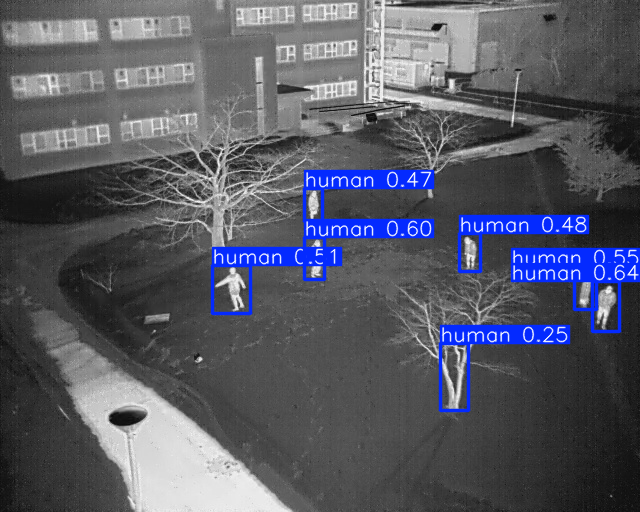

In [8]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk